In [2]:
#!pip install wordcloud
#!pip install pyLDAvis

# Capstone Project:
# DAB 402
# ROSHAN KALYANI:0773578


## DATA PREPROCESSING 

# SYSTEM info:


## MS WINDOWS 11 
## PYTHON VERSION: 3.10
## ANACONDA NAVIGATOR: 2.1.1

## PreProcessing Part

#  NLTK ( Natural Language Tool Kit) 
These applications include Chatbots, Language translation, Text Classification, Paragraph summarization, Spam filtering and many more. There are a few open-source NLP libraries, that do the job of processing text, like NLTK, Stanford NLP suite, Apache Open NLP, etc. NLTK is the most popular as well as an easy to understand library.

In [1]:
%%capture
import snscrape  ##Importing for scrape the data through twitter
import pandas as pd ##Importing pandas library
import regex as re ##Importing Regular Expression
import matplotlib.pyplot as plt ##Importing library to create interactive visulizations
import gensim.corpora as corpora  ##importing corpora as external part of corpus
import gensim  ##importing library to for topic modeling
import nltk ##Importing Natural Language Toolkit to perfom NLP operations
import pyLDAvis.gensim_models as gensimvis ##Importing gensim models through pyLDAvis for LDA model
import pyLDAvis ##Importing pyLDAvis for interactive topic model visualization
import pickle ##Impoting for serializing and de-serializing
from nltk.corpus import stopwords ##Importing Stopwords from nltk corpus
from nltk.stem import WordNetLemmatizer ##Importing this librarty to grouping inflected words in a single file
from nltk.tokenize import TweetTokenizer ##Importing this library to convert string to list of substring

# Stop words are words in any language or corpus that occur frequently. 
Do we always remove stop words? Are they always useless for us? 🙋‍♀️
The answer is no! 🙅‍♂️
We do not always remove the stop words. The removal of stop words is highly dependent on the task we are performing and the goal we want to achieve.
For some NLP tasks, they do not provide any additional or valuable information to the text containing them. Words like a, they, the, is, an, etc. are usually considered stop words.

In [2]:
%%capture
nltk.download('words') ##Downlaoding words through nltk 
nltk.download('stopwords') ##Downloading stopwords through nltk
nltk.download('wordnet') ##Downloading wordnet through nltk
nltk.download('vader_lexicon') ##Downloading Vader_Lexicon through nltk

# LINK OF DATASET (kaggle opensource website)
https://www.kaggle.com/datasets/erroshan/sentiment-analysis-on-twitter-data-during-covid

# Simple Example of removing Stop Words

Movie review:  “The movie was not good at all.”

Text after removal of stop words: “movie good”

In [3]:
##making dataframe with help of panda
data = pd.read_csv("R:/DBA_SEM_4/402 Capstone/GamingDatabase.csv",lineterminator='\n')

In [4]:
#There is more attributes in my dataframe therefore assigning display option as max columns. 
pd.set_option('display.max_columns', None)

#First 5 records of my dataset
data.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags\r
0,snscrape.modules.twitter.Tweet,https://twitter.com/BR0BOKEN/status/1410025253...,2021-06-29 23:59:52+00:00,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,1410025253770776579,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,4,0,1410025253770776579,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,['http://twitch.tv/br0boken'],['https://t.co/qAte5gJwuf'],"[{'_type': 'snscrape.modules.twitter.Gif', 'th...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['twitch', 'twitchstreaming', 'twitchaffiliate...",\r
1,snscrape.modules.twitter.Tweet,https://twitter.com/nerdynood/status/141002520...,2021-06-29 23:59:40+00:00,Did y'all know I'm live? Like right now?! You ...,Did y'all know I'm live? Like right now?! You ...,1410025206626852869,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,7,0,1410025206626852869,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,['http://Twitch.tv/NerdyNoodle16'],['https://t.co/yY4rHRVePM'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['smallstreamer', 'gaming', 'ApexLegends', 'tw...",\r
2,snscrape.modules.twitter.Tweet,https://twitter.com/ToxicShock18/status/141002...,2021-06-29 23:59:32+00:00,Been a bit had some things come up but we are ...,Been a bit had some things come up but we are ...,1410025172782960644,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1410025172782960644,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ApexLegends', 'APEX', 'gaming', 'streamer', ...",\r
3,snscrape.modules.twitter.Tweet,https://twitter.com/AmpedPotato/status/1410025...,2021-06-29 23:59:18+00:00,We transitioned to playing Hades! If you want ...,We transitioned to playing Hades! If you want ...,1410025113576222721,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,3,0,1410025113576222721,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['envtuber', 'Vtuber', 'HadesGame', 'gaming']",\r
4,snscrape.modules.twitter.Tweet,https://twitter.com/Alefd71/status/14100250666...,2021-06-29 23:59:07+00:00,YA ESTOY EN DIRECTO MI GENTE BELLA VENGAN A DI...,YA ESTOY EN DIRECTO MI GENTE BELLA VENGAN A DI...,1410025066650378247,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1410025066650378247,es,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,['https://www.twitch.tv/alefd7'],['https://t.co/Yi10e4EWwz'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['gaming', 'gamer', 'spanishgamer', 'twitch', ...",\r


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122440 entries, 0 to 1122439
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   _type             1122440 non-null  object 
 1   url               1122440 non-null  object 
 2   date              1122440 non-null  object 
 3   content           1122440 non-null  object 
 4   renderedContent   1122440 non-null  object 
 5   id                1122440 non-null  int64  
 6   user              1122440 non-null  object 
 7   replyCount        1122440 non-null  int64  
 8   retweetCount      1122440 non-null  int64  
 9   likeCount         1122440 non-null  int64  
 10  quoteCount        1122440 non-null  int64  
 11  conversationId    1122440 non-null  int64  
 12  lang              1122440 non-null  object 
 13  source            1122440 non-null  object 
 14  sourceUrl         1122440 non-null  object 
 15  sourceLabel       1122440 non-null  object 
 16  

In [6]:
## First records of my dataset by horizontal view
data.head().T

#data.head().T.to_csv('R:/DBA_SEM_4/402 Capstone/headt.csv')

,0,1,2,3,4
_type,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet,snscrape.modules.twitter.Tweet
url,https://twitter.com/BR0BOKEN/status/1410025253...,https://twitter.com/nerdynood/status/141002520...,https://twitter.com/ToxicShock18/status/141002...,https://twitter.com/AmpedPotato/status/1410025...,https://twitter.com/Alefd71/status/14100250666...
date,2021-06-29 23:59:52+00:00,2021-06-29 23:59:40+00:00,2021-06-29 23:59:32+00:00,2021-06-29 23:59:18+00:00,2021-06-29 23:59:07+00:00
content,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,Did y'all know I'm live? Like right now?! You ...,Been a bit had some things come up but we are ...,We transitioned to playing Hades! If you want ...,YA ESTOY EN DIRECTO MI GENTE BELLA VENGAN A DI...
renderedContent,Stream Schedule:\n\n6/29/21 - 8:15 PM EST\n6/3...,Did y'all know I'm live? Like right now?! You ...,Been a bit had some things come up but we are ...,We transitioned to playing Hades! If you want ...,YA ESTOY EN DIRECTO MI GENTE BELLA VENGAN A DI...
id,1410025253770776579,1410025206626852869,1410025172782960644,1410025113576222721,1410025066650378247
user,"{'_type': 'snscrape.modules.twitter.User', 'us...","{'_type': 'snscrape.modules.twitter.User', 'us...","{'_type': 'snscrape.modules.twitter.User', 'us...","{'_type': 'snscrape.modules.twitter.User', 'us...","{'_type': 'snscrape.modules.twitter.User', 'us..."
replyCount,1,0,0,0,0
retweetCount,6,3,1,1,0
likeCount,4,7,2,3,0


In [7]:
data.shape

(1122440, 28)

In [19]:
data['quoteCount'].value_counts()

0       1067602
1         44996
2          5811
3          1817
4           679
         ...   
92            1
118           1
899           1
2354          1
58            1
Name: quoteCount, Length: 114, dtype: int64

In [20]:
#Counting the total null value attribute-wise.
data.isnull().sum().sort_values(ascending=False)

#Saving Null Count info as csv
#Gaming_Null_info = data.isnull().sum().sort_values(ascending=False)
#Gaming_Null_info.to_csv("R:/DBA_SEM_4/402 Capstone/Gaming_Null_info.csv")

retweetedTweet      1122440
place               1109492
coordinates         1109486
quotedTweet         1083895
inReplyToUser       1078887
inReplyToTweetId    1078887
mentionedUsers       844379
media                594097
tcooutlinks          363423
outlinks             363423
hashtags                 77
_type                     0
url                       0
sourceLabel               0
sourceUrl                 0
source                    0
lang                      0
conversationId            0
quoteCount                0
likeCount                 0
retweetCount              0
replyCount                0
user                      0
id                        0
renderedContent           0
content                   0
date                      0
cashtags\r                0
dtype: int64

In [21]:
#checking duplication in my dataset
data.duplicated().sum()

0

In [22]:
data.drop(columns = ['_type','url','source','sourceUrl','outlinks','tcooutlinks','media','retweetedTweet','quotedTweet','inReplyToTweetId','inReplyToUser','mentionedUsers','coordinates','place','cashtags\r'],inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122440 entries, 0 to 1122439
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             1122440 non-null  object
 1   content          1122440 non-null  object
 2   renderedContent  1122440 non-null  object
 3   id               1122440 non-null  int64 
 4   user             1122440 non-null  object
 5   replyCount       1122440 non-null  int64 
 6   retweetCount     1122440 non-null  int64 
 7   likeCount        1122440 non-null  int64 
 8   quoteCount       1122440 non-null  int64 
 9   conversationId   1122440 non-null  int64 
 10  lang             1122440 non-null  object
 11  sourceLabel      1122440 non-null  object
 12  hashtags         1122363 non-null  object
dtypes: int64(6), object(7)
memory usage: 111.3+ MB


In [27]:
##AFter removing which consisits most null
##data.isnull().sum().sort_values(ascending=False).to_csv("R:/DBA_SEM_4/402 Capstone/AfterDropinfo.csv")

In [28]:
#change data type
data["lang"] = data["lang"].astype("category")
data["sourceLabel"] = data["sourceLabel"].astype("category")

In [29]:
#Retriving various language which are present in data 
print("lang", data.lang.unique())

lang ['en', 'es', 'tl', 'ht', 'und', ..., 'kn', 'ml', 'iw', 'sr', 'si']
Length: 51
Categories (51, object): ['ar', 'bg', 'bn', 'ca', ..., 'und', 'ur', 'vi', 'zh']


# ISO CODES FOR LANGUAGES

## https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes 

## Follow the link for better understanding of that abbreviation 

In [30]:
tweetlang = pd.DataFrame(data['lang'].value_counts().nlargest(10))

In [31]:
#Saving top 10 tweet counts by thier langauge
#tweetlang.to_csv('R:/DBA_SEM_4/402 Capstone/tweetlang.csv')

<AxesSubplot:>

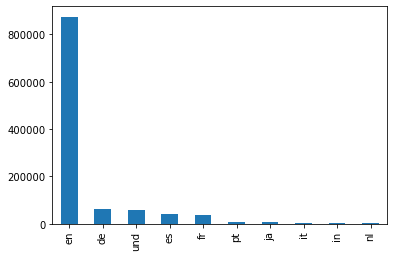

In [32]:
data['lang'].value_counts().nlargest(10).plot(kind = 'bar')

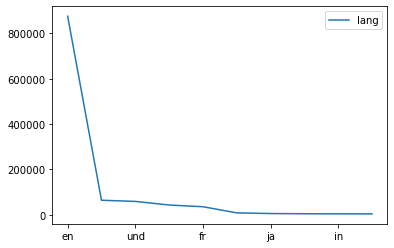

In [36]:
tweetlang.plot(kind = 'line')
#plt.savefig('R:/DBA_SEM_4/402 Capstone/tweetlang.jpeg')

In [37]:
#count total records of tweets which language English  
print("Total count of tweets which are in English",(data['lang'] == "en").sum(), ".")

Total count of tweets which are in English 875658 .


In [38]:
#count total records of tweets which language doesn't English  
print("Total count of tweets which are not in English", (data['lang'] != "en").sum(),".")

Total count of tweets which are not in English 246782 .


([<matplotlib.patches.Wedge at 0x1a8fda0b670>,
 [Text(-1.0598353039154405, 0.8759989318340896, 'Tweets in English'),
  Text(1.0598352629069692, -0.8759989814485605, 'Tweets in Foriegn Languages')],
 [Text(-0.5780919839538765, 0.4778175991822307, '78.01%'),
  Text(0.5780919615856196, -0.47781762624466934, '21.99%')])

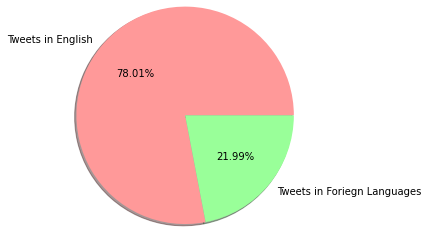

In [39]:
##PIE chart regarding the Language
pie_labels = ['Tweets in English', 'Tweets in Foriegn Languages']
pie_values = [(data['lang'] == "en").sum(),(data['lang'] != "en").sum()]

plt.pie(pie_values, labels=pie_labels, 
        radius=1.25, 
        autopct='%0.2f%%', shadow=True, 
        colors=['#ff9999','#99ff99'])

##plt.savefig('R:/DBA_SEM_4/402 Capstone/pie_lang.jpeg')

In [40]:
## Droping those tweet records which are not english
data.drop(data[data['lang'] != "en"].index,inplace = True)

In [41]:
# check Unique in source label
print(data['sourceLabel'].unique())

['Twitter Web App', 'Twitter for Android', 'Twitter for iPhone', 'HubSpot', 'Streamlabs Twitter', ..., 'UNIAN Info', 'erased19641409', 'kevin kavanagh1', 'sewan', 'Identity V']
Length: 860
Categories (1104, object): [' MP1st', '15 Minute Fun', '15 Minute News Entertainment', '1Conn', ..., 'zsbebebe', 'zzposts', 'Оwly', '虹色カノジョ２d Twitter投稿']


In [42]:
#Count total in source labels
data['sourceLabel'].value_counts()

Twitter Web App          258493
Twitter for iPhone       157386
Twitter for Android      149480
IFTTT                     39296
Streamlabs Twitter        34683
                          ...  
INoticiasCL_APP_WRI_3         0
Zlappo.com                    0
IT-Kanalen.se                 0
ZEITonline                    0
Satınalma Dergisi 2           0
Name: sourceLabel, Length: 1104, dtype: int64

In [43]:
##Let's Retrieve total count from various only the most popular souce
print("Count of Tweets from Android",data[data['sourceLabel'] == 'Twitter for Android'].shape,".")
print("Count of Tweets from Web Application",data[data['sourceLabel'] == 'Twitter Web App'].shape,".")
print("Count of Tweets from iphone",data[data['sourceLabel'] == 'Twitter for iPhone'].shape,".")


Count of Tweets from Android (149480, 13) .
Count of Tweets from Web Application (258493, 13) .
Count of Tweets from iphone (157386, 13) .


In [51]:
#Let's see topn 20 sourcelael
TOPSource = data['sourceLabel'].value_counts().nlargest(20)
TOPSource
#TOPSource.to_csv("R:/DBA_SEM_4/402 Capstone/TOPSource.csv", index = False)

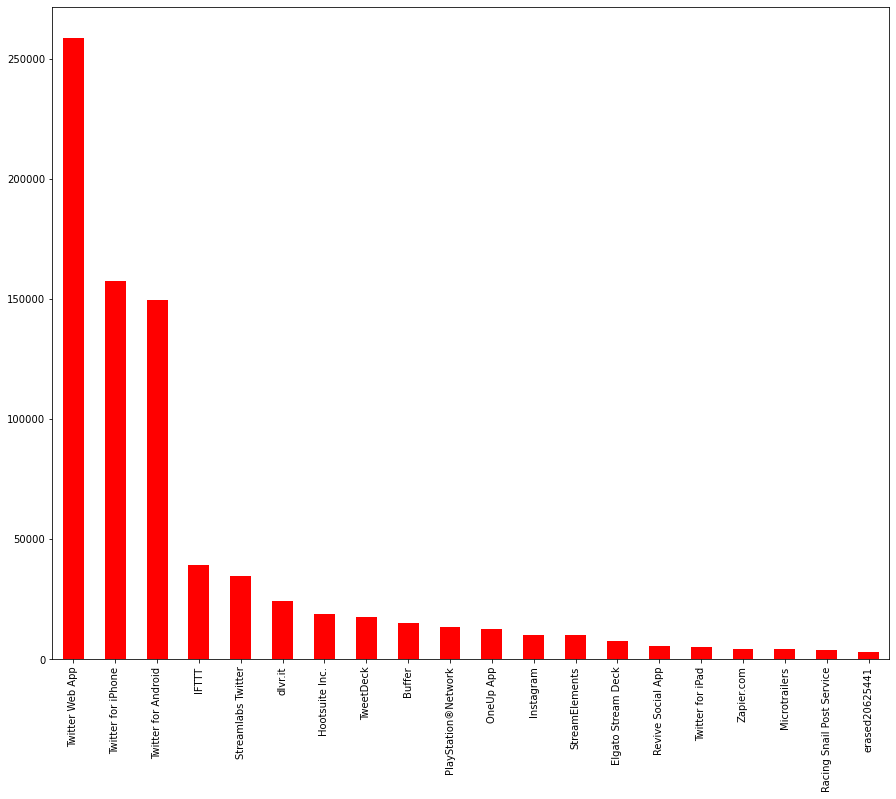

In [52]:
TOPSource.plot.bar(color = 'red' , figsize = (15,12))
#plt.savefig('R:/DBA_SEM_4/402 Capstone/soucelabeltop20.jpeg')

 ### As here I want to know there are any records which have null values??? If yes then that records contain tweet content realted gaming or not???
 

In [53]:
data[data['hashtags'].isna()]

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceLabel,hashtags
3486,2021-06-29 12:30:48+00:00,What's your favorite?\n#gaming#pubg#freefire,What's your favorite?\n#gaming#pubg#freefire,1409851846068523009,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,1409851846068523009,en,Twitter for Android,NaN
12138,2021-06-27 21:20:34+00:00,What do you on a normal Friday?#gaming#daysgon...,What do you on a normal Friday?#gaming#daysgon...,1409260390186328068,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1409260390186328068,en,Instagram,NaN
48149,2021-06-21 16:40:09+00:00,This Tweet from @Omenzz has been withheld in r...,This Tweet from @Omenzz has been withheld in r...,1407015495266713602,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,0,1407015495266713602,en,Twitter for iPhone,NaN
53142,2021-06-20 17:50:56+00:00,#gaming#ALFA#Gaming#battleground mobile India#...,#gaming#ALFA#Gaming#battleground mobile India#...,1406670918600912901,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,0,1406670914826035203,en,Twitter for Android,NaN
69901,2021-06-17 16:19:41+00:00,Just a kid with a big dream 🌁\n#gaming#FaZecla...,Just a kid with a big dream 🌁\n#gaming#FaZecla...,1405560791156334594,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,0,1405560791156334594,en,Twitter for iPhone,NaN
72028,2021-06-17 08:45:02+00:00,Yo! WHATS UP!! 🎮🎮\n#gaming#ps4#pc#xbox,Yo! WHATS UP!! 🎮🎮\n#gaming#ps4#pc#xbox,1405446373676228614,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1405446373676228614,en,Twitter for Android,NaN
110396,2021-06-11 02:54:53+00:00,Waiting for the bitch load... #gaming#bored#se...,Waiting for the bitch load... #gaming#bored#se...,1403183929587286016,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1403183929587286016,en,Twitter for Android,NaN
171386,2021-06-01 02:27:06+00:00,This Tweet from @CzarneckiNoah has been withhe...,This Tweet from @CzarneckiNoah has been withhe...,1399553059244720128,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,8,0,1399553059244720128,en,Twitter for iPhone,NaN
310792,2021-05-08 03:56:02+00:00,New video •_• #gaming#youtube#western#funny#hu...,New video •_• #gaming#youtube#western#funny#hu...,1390878129854369793,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1390878129854369793,en,Instagram,NaN
324873,2021-05-05 23:34:39+00:00,Who needs real life when we have psychological...,Who needs real life when we have psychological...,1390087574920761349,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,1390087574920761349,en,Twitter for iPhone,NaN


 ## As here I validate those record have content and that is related to "GAMING".

In [55]:
#Saving Pre Processing Data

#preprocessing_data = data

In [56]:
#Saving preprocessing data for further progress
#preprocessing_data.to_csv("R:/DBA_SEM_4/402 Capstone/PreprocessingData.csv", index = False)